# FeatureTools quickstart:

https://featuretools.alteryx.com/en/stable/index.html

In [15]:
import featuretools as ft
import pandas as pd

In [2]:
data = ft.demo.load_mock_customer()

In [3]:
data

{'customers':    customer_id zip_code           join_date date_of_birth
 0            1    60091 2011-04-17 10:48:33    1994-07-18
 1            2    13244 2012-04-15 23:31:04    1986-08-18
 2            3    13244 2011-08-13 15:42:34    2003-11-21
 3            4    60091 2011-04-08 20:08:14    2006-08-15
 4            5    60091 2010-07-17 05:27:50    1984-07-28,
 'sessions':     session_id  customer_id   device       session_start
 0            1            2  desktop 2014-01-01 00:00:00
 1            2            5   mobile 2014-01-01 00:17:20
 2            3            4   mobile 2014-01-01 00:28:10
 3            4            1   mobile 2014-01-01 00:44:25
 4            5            4   mobile 2014-01-01 01:11:30
 5            6            1   tablet 2014-01-01 01:23:25
 6            7            3   tablet 2014-01-01 01:39:40
 7            8            4   tablet 2014-01-01 01:55:55
 8            9            1  desktop 2014-01-01 02:15:25
 9           10            2   tablet 20

In [4]:
customers_df = data["customers"]
customers_df

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [5]:
sessions_df = data["sessions"]
sessions_df

,session_id,customer_id,device,session_start
0,1,2,desktop,2014-01-01 00:00:00
1,2,5,mobile,2014-01-01 00:17:20
2,3,4,mobile,2014-01-01 00:28:10
3,4,1,mobile,2014-01-01 00:44:25
4,5,4,mobile,2014-01-01 01:11:30
5,6,1,tablet,2014-01-01 01:23:25
6,7,3,tablet,2014-01-01 01:39:40
7,8,4,tablet,2014-01-01 01:55:55
8,9,1,desktop,2014-01-01 02:15:25
9,10,2,tablet,2014-01-01 02:31:40


In [6]:
transactions_df = data["transactions"]
transactions_df

,transaction_id,session_id,transaction_time,product_id,amount
0,298,1,2014-01-01 00:00:00,5,127.64
1,2,1,2014-01-01 00:01:05,2,109.48
2,308,1,2014-01-01 00:02:10,3,95.06
3,116,1,2014-01-01 00:03:15,4,78.92
4,371,1,2014-01-01 00:04:20,3,31.54
...,...,...,...,...,...
495,112,35,2014-01-01 08:56:15,5,55.42
496,111,35,2014-01-01 08:57:20,3,34.87
497,276,35,2014-01-01 08:58:25,1,10.94
498,266,35,2014-01-01 08:59:30,5,19.86


In [7]:
entities = {"customers" : (customers_df, "customer_id"),
            "sessions" : (sessions_df, "session_id", "session_start"),
            "transactions" : (transactions_df, "transaction_id", "transaction_time")
           }

In [8]:
entities

{'customers': (   customer_id zip_code           join_date date_of_birth
  0            1    60091 2011-04-17 10:48:33    1994-07-18
  1            2    13244 2012-04-15 23:31:04    1986-08-18
  2            3    13244 2011-08-13 15:42:34    2003-11-21
  3            4    60091 2011-04-08 20:08:14    2006-08-15
  4            5    60091 2010-07-17 05:27:50    1984-07-28,
  'customer_id'),
 'sessions': (    session_id  customer_id   device       session_start
  0            1            2  desktop 2014-01-01 00:00:00
  1            2            5   mobile 2014-01-01 00:17:20
  2            3            4   mobile 2014-01-01 00:28:10
  3            4            1   mobile 2014-01-01 00:44:25
  4            5            4   mobile 2014-01-01 01:11:30
  5            6            1   tablet 2014-01-01 01:23:25
  6            7            3   tablet 2014-01-01 01:39:40
  7            8            4   tablet 2014-01-01 01:55:55
  8            9            1  desktop 2014-01-01 02:15:25
  9   

In [9]:
relationships = [("sessions", "session_id", "transactions", "session_id"),
                 ("customers", "customer_id", "sessions", "customer_id")]

In [10]:
relationships

[('sessions', 'session_id', 'transactions', 'session_id'),
 ('customers', 'customer_id', 'sessions', 'customer_id')]

In [11]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities,
                                                 relationships=relationships,
                                                 target_entity="customers")

In [12]:
feature_matrix_customers

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,1057.97,582.193117,78.59,40,-0.476122,312.745952,1,mobile,1,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,931.63,548.905851,154.60,35,-0.277640,258.700528,2,desktop,1,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,847.63,405.237462,66.21,29,2.286086,257.299895,3,desktop,1,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,1157.99,649.657515,131.51,37,0.002764,356.125829,4,mobile,1,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,839.76,472.231119,86.49,30,0.014384,259.873954,5,mobile,1,3


In [13]:
features_defs

[<Feature: zip_code>,
 <Feature: COUNT(sessions)>,
 <Feature: MODE(sessions.device)>,
 <Feature: NUM_UNIQUE(sessions.device)>,
 <Feature: COUNT(transactions)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: NUM_UNIQUE(transactions.product_id)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: DAY(date_of_birth)>,
 <Feature: DAY(join_date)>,
 <Feature: MONTH(date_of_birth)>,
 <Feature: MONTH(join_date)>,
 <Feature: WEEKDAY(date_of_birth)>,
 <Feature: WEEKDAY(join_date)>,
 <Feature: YEAR(date_of_birth)>,
 <Feature: YEAR(join_date)>,
 <Feature: MAX(sessions.COUNT(transactions))>,
 <Feature: MAX(sessions.MEAN(transactions.amount))>,
 <Feature: MAX(sessions.MIN(transactions.amount))>,
 <Feature: MAX(sessions.NUM_UNIQUE(transactions.product_id))>,
 <Feature: MAX(sessions.SKEW(transactions.amount)

In [16]:
pd.set_option('max_columns', None)
feature_matrix_customers

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),SUM(transactions.amount),DAY(date_of_birth),DAY(join_date),MONTH(date_of_birth),MONTH(join_date),WEEKDAY(date_of_birth),WEEKDAY(join_date),YEAR(date_of_birth),YEAR(join_date),MAX(sessions.COUNT(transactions)),MAX(sessions.MEAN(transactions.amount)),MAX(sessions.MIN(transactions.amount)),MAX(sessions.NUM_UNIQUE(transactions.product_id)),MAX(sessions.SKEW(transactions.amount)),MAX(sessions.STD(transactions.amount)),MAX(sessions.SUM(transactions.amount)),MEAN(sessions.COUNT(transactions)),MEAN(sessions.MAX(transactions.amount)),MEAN(sessions.MEAN(transactions.amount)),MEAN(sessions.MIN(transactions.amount)),MEAN(sessions.NUM_UNIQUE(transactions.product_id)),MEAN(sessions.SKEW(transactions.amount)),MEAN(sessions.STD(transactions.amount)),MEAN(sessions.SUM(transactions.amount)),MIN(sessions.COUNT(transactions)),MIN(sessions.MAX(transactions.amount)),MIN(sessions.MEAN(transactions.amount)),MIN(sessions.NUM_UNIQUE(transactions.product_id)),MIN(sessions.SKEW(transactions.amount)),MIN(sessions.STD(transactions.amount)),MIN(sessions.SUM(transactions.amount)),MODE(sessions.DAY(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.MONTH(session_start)),MODE(sessions.WEEKDAY(session_start)),MODE(sessions.YEAR(session_start)),NUM_UNIQUE(sessions.DAY(session_start)),NUM_UNIQUE(sessions.MODE(transactions.product_id)),NUM_UNIQUE(sessions.MONTH(session_start)),NUM_UNIQUE(sessions.WEEKDAY(session_start)),NUM_UNIQUE(sessions.YEAR(session_start)),SKEW(sessions.COUNT(transactions)),SKEW(sessions.MAX(transactions.amount)),SKEW(sessions.MEAN(transactions.amount)),SKEW(sessions.MIN(transactions.amount)),SKEW(sessions.NUM_UNIQUE(transactions.product_id)),SKEW(sessions.STD(transactions.amount)),SKEW(sessions.SUM(transactions.amount)),STD(sessions.COUNT(transactions)),STD(sessions.MAX(transactions.amount)),STD(sessions.MEAN(transactions.amount)),STD(sessions.MIN(transactions.amount)),STD(sessions.NUM_UNIQUE(transactions.product_id)),STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011,25,88.755625,26.36,5,0.640252,46.905665,1613.93,15.750000,132.246250,72.774140,9.823750,5.000000,-0.059515,39.093244,1128.202500,12,118.90,50.623125,5,-1.038434,30.450261,809.97,1,4,1,2,2014,1,4,1,1,1,1.946018,-0.780493,-0.424949,2.440005,0.000000,-0.312355,0.778170,4.062019,7.322191,13.759314,6.954507,0.000000,0.589386,279.510713,1057.97,582.193117,78.59,40,-0.476122,312.745952,1,mobile,1,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,0.098259,37.705178,7200.28,18,15,8,4,0,6,1986,2012,18,96.581000,56.46,5,0.755711,47.935920,1320.64,13.285714,133.090000,78.415122,22.085714,5.000000,-0.039663,36.957218,1028.611429,8,100.04,61.910000,5,-0.763603,27.839228,634.84,1,3,1,2,2014,1,4,1,1,1,-0.303276,-1.539467,0.235296,2.154929,0.000000,0.013087,-0.440929,3.450328,17.221593,11.477071,15.874374,0.000000,0.509798,251.609234,931.63,548.905851,154.60,35,-0.277640,258.700528,2,desktop,1,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,0.418230,43.683296,6236.62,21,13,11,8,4,5,2003,2011,18,82.109444,20.06,5,0.854976,50.110120,1477.97,15.500000,141.271667,67.539577,1

In [17]:
# Change target entity

feature_matrix_sessions, features_defs = ft.dfs(entities=entities,
                                                relationships=relationships,
                                                target_entity="sessions")

In [18]:
features_defs

[<Feature: customer_id>,
 <Feature: device>,
 <Feature: COUNT(transactions)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: NUM_UNIQUE(transactions.product_id)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: DAY(session_start)>,
 <Feature: MONTH(session_start)>,
 <Feature: WEEKDAY(session_start)>,
 <Feature: YEAR(session_start)>,
 <Feature: customers.zip_code>,
 <Feature: MODE(transactions.DAY(transaction_time))>,
 <Feature: MODE(transactions.MONTH(transaction_time))>,
 <Feature: MODE(transactions.WEEKDAY(transaction_time))>,
 <Feature: MODE(transactions.YEAR(transaction_time))>,
 <Feature: NUM_UNIQUE(transactions.DAY(transaction_time))>,
 <Feature: NUM_UNIQUE(transactions.MONTH(transaction_time))>,
 <Feature: NUM_UNIQUE(transactions.WEEKDAY(transaction_time))>,
 <Feature: NUM_UNIQUE(tr

In [19]:
feature_matrix_sessions

,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),SUM(transactions.amount),DAY(session_start),MONTH(session_start),WEEKDAY(session_start),YEAR(session_start),customers.zip_code,MODE(transactions.DAY(transaction_time)),MODE(transactions.MONTH(transaction_time)),MODE(transactions.WEEKDAY(transaction_time)),MODE(transactions.YEAR(transaction_time)),NUM_UNIQUE(transactions.DAY(transaction_time)),NUM_UNIQUE(transactions.MONTH(transaction_time)),NUM_UNIQUE(transactions.WEEKDAY(transaction_time)),NUM_UNIQUE(transactions.YEAR(transaction_time)),customers.COUNT(sessions),customers.MODE(sessions.device),customers.NUM_UNIQUE(sessions.device),customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MEAN(transactions.amount),customers.MIN(transactions.amount),customers.MODE(transactions.product_id),customers.NUM_UNIQUE(transactions.product_id),customers.SKEW(transactions.amount),customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(date_of_birth),customers.DAY(join_date),customers.MONTH(date_of_birth),customers.MONTH(join_date),customers.WEEKDAY(date_of_birth),customers.WEEKDAY(join_date),customers.YEAR(date_of_birth),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,1229.01,1,1,2,2014,13244,1,1,2,2014,1,1,1,1,7,desktop,3,93,146.81,77.422366,8.73,4,5,0.098259,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,746.96,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,6,mobile,3,79,149.02,80.375443,7.55,5,5,-0.025941,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,1329.00,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,1613.93,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,777.02,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,45.068765,8727.68,15,8,8,4,1,4,2006,2011
6,1,tablet,15,139.23,84.440000,8.74,4,5,-0.134754,42.654755,1266.60,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011
7,3,tablet,15,146.31,62.791333,8.19,1,5,0.618455,47.264797,941.87,1,1,2,2014,13244,1,1,2,2014,1,1,1,1,6,desktop,3,93,149.15,67.060430,5.89,1,5,0.418230,43.683296,6236.62,21,13,11,8,4,5,2003,2011
8,4,tablet,18,143.85,75.081111,12.59,1,5,0.200676,44.213242,1351.46,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,45.068765,8727.68,15,8,8,4,1,4,2006,2011
9,1,desktop,15,132.72,70.135333,5.81,1,5,0.226337,46.905665,1052.03,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011


In [20]:
feature = features_defs[18]

In [21]:
feature

<Feature: MODE(transactions.WEEKDAY(transaction_time))>

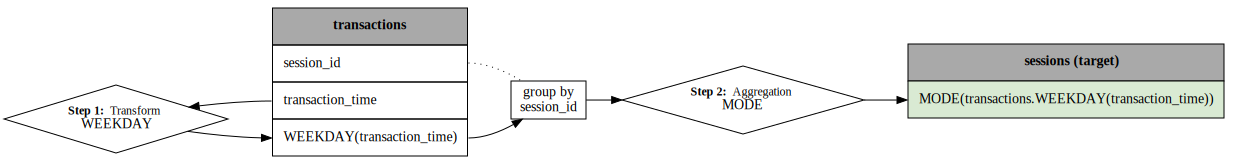

In [22]:
ft.graph_feature(feature)

customers_df: 

- customer_id
- zip_code
- join_date
- date_of_birth

sessions_df:

- session_id
- customer_id
- device
- session_start

transactions_df:

- transaction_id
- session_id
- transaction_time
- product_id
- amount

entities = {"customers" : (customers_df, "customer_id"),
            "sessions" : (sessions_df, "session_id", "session_start"),
            "transactions" : (transactions_df, "transaction_id", "transaction_time")
           }


feature_matrix_customers, features_defs = ft.dfs(entities=entities, relationships=relationships,target_entity="customers")

From customers_df: 

zip_code, join_date --> date, month, year

date_of_birth --> date, month, year

From sessions_df:

device

From transactions_df:

product_id, amount 
